In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def g0_sampler():
    return np.random.normal(0, 1)

def f_sampler(theta):
    return np.random.normal(theta, 0.1)

def F_likelihood(theta, x):
    return np.exp(-(theta - x)**2 / (2 * 0.1**2))

In [3]:
def DP_sampler(n, alpha):
    # Sample the thetas
    thetas = []
    for i in range(n):
        u = np.random.uniform()
        if u < alpha / (alpha + i):
            thetas.append(g0_sampler())
        else:
            thetas.append(thetas[np.random.randint(0, i)])
    return thetas

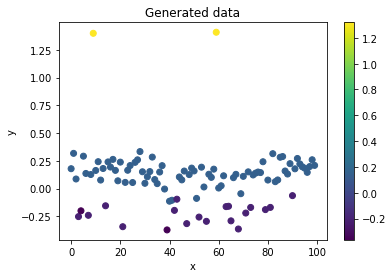

In [4]:
# Generate data
n = 100
alpha = 0.25
thetas = DP_sampler(n, alpha)
y = np.array([f_sampler(theta) for theta in thetas])

# Plot data
plt.figure()
plt.scatter(np.arange(n), y, c=thetas)
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()